In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/AA_PROJ_2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/AA_PROJ_2


In [ ]:
import pickle
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import os

from os import listdir
from os.path import isfile, join

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Conv1D, Dropout, MaxPooling1D, Flatten,Activation,LSTM, BatchNormalization

In [ ]:
train_path = "Pickled_Data/simple_pickle/npData_10sec/train"
valid_path = "Pickled_Data/simple_pickle/npData_10sec/valid"

In [ ]:
dict_genres = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 
               'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7  }

print(len(dict_genres))

Fast



In [ ]:
from tqdm import tqdm
X_train_np =[]
for root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/train"):
  for file in tqdm(files):
    X_train_np.append(np.load(os.path.join(root,file)).reshape(-1,1)[:59049])
    

In [ ]:
for root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/train"):
  for file in tqdm(files):
    X_train_np.append(np.load(os.path.join(root,file)).reshape(-1,1)[59049:59049*2])

In [ ]:
print(X_train_np[0].shape)
X_train_np= np.array(X_train_np) 
print(X_train_np.shape)

In [ ]:
from tqdm import tqdm
X_test_np =[]

for root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/test"):
  for file in tqdm(files):
    X_test_np.append(np.load(os.path.join(root,file)).reshape(-1,1)[:59049])

100%|██████████| 1599/1599 [14:08<00:00,  1.88it/s]


In [ ]:
print(X_test_np[0].shape)
X_test_np= np.array(X_test_np) 
print(X_test_np.shape)

(59049, 1)
(1599, 59049, 1)


*slow* ????????????????????????????

In [ ]:
from tqdm import tqdm
X_valid_np = []
X_valid_np2 = []
for root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/valid"):
  for file in tqdm(files):
    X_valid_np.append(np.load(os.path.join(root,file)).reshape(-1,1)[:59049])
    X_valid_np2.append(np.load(os.path.join(root,file)).reshape(-1,1)[59049:59049*2])

In [ ]:
from tqdm import tqdm
for root, dirs, files in os.walk("Pickled_Data/simple_pickle/npData_10sec/valid"):
  for file in tqdm(files):
    X_valid_np.append(np.load(os.path.join(root,file)).reshape(-1,1)[59049:59049*2])

In [ ]:
print(X_valid_np[0].shape)
X_valid_np= np.array(X_valid_np) 
print(X_valid_np.shape)

In [ ]:
y_train = tf.keras.utils.to_categorical(np.vectorize(dict_genres.get)(pickle.load(open("Pickled_Data/simple_pickle/y_train.pickle","rb"))),num_classes=8)    
y_valid = tf.keras.utils.to_categorical(np.vectorize(dict_genres.get)(pickle.load(open("Pickled_Data/simple_pickle/y_valid.pickle","rb"))),num_classes=8)  
y_test = tf.keras.utils.to_categorical(np.vectorize(dict_genres.get)(pickle.load(open("Pickled_Data/simple_pickle/y_test.pickle","rb"))),num_classes=8)  

In [ ]:
y_train_j = np.tile(y_train,(2,1))

In [ ]:
print(y_train_j)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
y_valid_j = np.tile(y_valid,(2,1))

slow

In [ ]:
def generate_batch_train(batch_size):
  
  y_train = pickle.load(open("Pickled_Data/simple_pickle/y_train.pickle","rb"))

  while True:
    for fileBatchStart in range(0, len(X_train_files), batch_size):
      
      yield ([np.load(file) for file in X_train_files[fileBatchStart:(fileBatchStart + batch_size)]], 
             tf.keras.utils.to_categorical(np.vectorize(dict_genres.get)(y_train[fileBatchStart:(fileBatchStart + batch_size)]), num_classes=8))

In [ ]:
'''
gen = generate_batch_train(10)
for i in range(0,1000):
  if len(next(gen)[0]) != 10:
    print("damn")

'''

#NETWORK


In [ ]:
print(len(X_train_np ))
print(len(X_valid_np))
#print(len(X_test_np))
print(" ")
print(len(y_train_j))
print(len(y_valid_j))
print(len(y_test))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Conv1D, Dropout, MaxPool1D, Flatten,Activation,LSTM, BatchNormalization
from tensorflow.keras.optimizers import SGD

model = Sequential()
#1 conv 3-128 stride-3
model.add(Conv1D(filters=128, kernel_size=3, strides=3, padding='valid',input_shape=(59049, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#2 conv 3-128 stride-1
model.add(Conv1D(filters=128, kernel_size=3,  padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#3 conv 3-128 stride-1
model.add(Conv1D(filters=128, kernel_size=3,  padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))



#4 conv 3-256 stride-1
model.add(Conv1D(filters=256, kernel_size=3,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#5 conv 3-256 stride-1
model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#6 conv 3-256 stride-1
model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#7 conv 3-256 stride-1
model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#8 conv 3-256 stride-1
model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))



#8 conv 3-512 stride-1
model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#8 conv 3-512 stride-1
model.add(Conv1D(filters=512, kernel_size=3,  padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

#8 conv 3-512 stride-1
model.add(Conv1D(filters=512, kernel_size=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
sgd = SGD(lr=0.0004,decay=1e-6,momentum=0.9,nesterov=True)
model.add(Dense(8,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train_np, y_train_j,
                    batch_size=4,
                    epochs=70,
                    validation_data=(X_valid_np, y_valid_j))

In [ ]:
import matplotlib.pyplot as plt
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


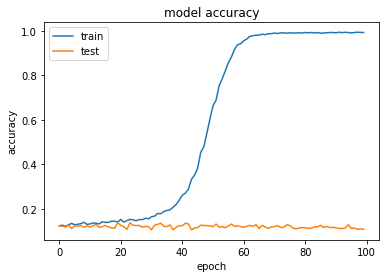

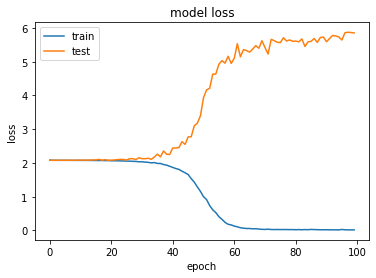

In [ ]:
show_summary_stats(history)